## 🎯 Challenge
*Predicting a safety score for Women in Costa Rica*

## Team: Data Dreamers
## 👥 Authors
* Luckshan Sivakumar
* Nikhil Kulkarni
* Sourabh Hujare
* Ronney Mathews

### Data Cleaning & EDA

In [75]:
# Importing dependancies
#import fbprophet
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# import mplleaflet
# import contextily as cx
# import folium
# from folium.plugins import HeatMap
# import geopandas as gpd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [76]:
# Importing dataset costa_rica_crimes_english.csv

df = pd.read_csv('data/costa_rica_crimes_english.csv')
df.head()

Unnamed: 0    Crime SubtypeCrime      Date                 Time  \
0           0  ASSAULT  COLD WEAPON  08.01.22  06:00:00 - 08:59:59   
1           1  ASSAULT  COLD WEAPON  12.01.22  12:00:00 - 14:59:59   
2           2  ASSAULT  COLD WEAPON  13.01.22  18:00:00 - 20:59:59   
3           3  ASSAULT  COLD WEAPON  15.01.22  03:00:00 - 05:59:59   
4           4  ASSAULT  COLD WEAPON  13.01.22  15:00:00 - 17:59:59   

                                       SubtypeVictim      Age   Gender  \
0                            LOTTERY SELLER [PERSON]  >18 y/o   female   
1  PUBLIC SERVICE/LEGAL OR ILLEGAL TAXI/BUS [VEHI...  unknown  unknown   
2                                PEDESTRIAN [PERSON]  >18 y/o   female   
3                                PEDESTRIAN [PERSON]  >18 y/o     male   
4                                PEDESTRIAN [PERSON]  >18 y/o   female   

   Nationality    Province      Canton   District  
0   COSTA RICA    SAN JOSE    SAN JOSE   HOSPITAL  
1  Desconocido  PUNTARENAS  PUNTARENAS  CHACARITA  
2   COSTA RICA    SAN JOSE      ASERRI     ASERRI  
3    NICARAGUA    SAN JOSE      ASERRI     ASERRI  
4   COSTA RICA    SAN JOSE    SAN JOSE   HOSPITAL

In [77]:
df.describe(include = 'all')

Unnamed: 0   Crime    SubtypeCrime      Date                 Time  \
count   648226.000000  648226          648226    648226               648226   
unique            NaN       6              39      4487                    8   
top               NaN   THEFT  DUE TO NEGLECT  17.01.15  00:00:00 - 02:59:59   
freq              NaN  201255          104164       375               145059   
mean     26573.531830     NaN             NaN       NaN                  NaN   
std      16202.711627     NaN             NaN       NaN                  NaN   
min          0.000000     NaN             NaN       NaN                  NaN   
25%      12465.000000     NaN             NaN       NaN                  NaN   
50%      25947.000000     NaN             NaN       NaN                  NaN   
75%      39451.750000     NaN             NaN       NaN                  NaN   
max      62906.000000     NaN             NaN       NaN                  NaN   

              SubtypeVictim      Age  Gender Nationality  Province    Canton  \
count                648226   648226  648226      648226    648226    648226   
unique                   94        4       3         162         8        83   
top     PEDESTRIAN [PERSON]  >18 y/o    male  COSTA RICA  SAN JOSE  SAN JOSE   
freq                 143507   559971  410106      528496    236525    104287   
mean                    NaN      NaN     NaN         NaN       NaN       NaN   
std                     NaN      NaN     NaN         NaN       NaN       NaN   
min                     NaN      NaN     NaN         NaN       NaN       NaN   
25%                     NaN      NaN     NaN         NaN       NaN       NaN   
50%                     NaN      NaN     NaN         NaN       NaN       NaN   
75%                     NaN      NaN     NaN         NaN       NaN       NaN   
max                     NaN      NaN     NaN         NaN       NaN       NaN   

        District  
count     648226  
unique       391  
top     HOSPITAL  
freq       17675  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN

In [78]:
df.describe(include = 'object')

Crime    SubtypeCrime      Date                 Time  \
count   648226          648226    648226               648226   
unique       6              39      4487                    8   
top      THEFT  DUE TO NEGLECT  17.01.15  00:00:00 - 02:59:59   
freq    201255          104164       375               145059   

              SubtypeVictim      Age  Gender Nationality  Province    Canton  \
count                648226   648226  648226      648226    648226    648226   
unique                   94        4       3         162         8        83   
top     PEDESTRIAN [PERSON]  >18 y/o    male  COSTA RICA  SAN JOSE  SAN JOSE   
freq                 143507   559971  410106      528496    236525    104287   

        District  
count     648226  
unique       391  
top     HOSPITAL  
freq       17675

Performing some EDA on the given dataset using Tableau, we find the following:
 

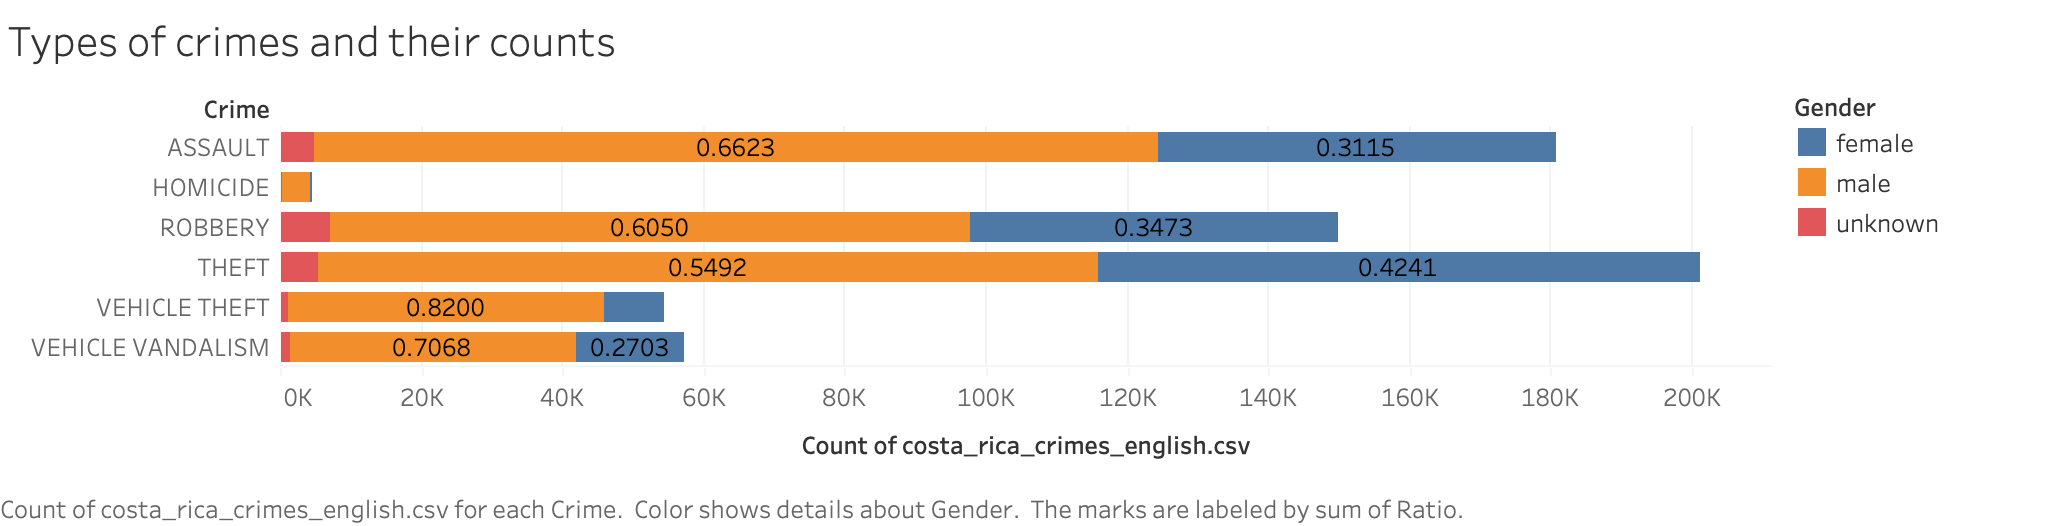

* 30-40% of reported crimes on the country level are on women.
* `Theft` and `Assault` are the 2 mostly reported crimes types

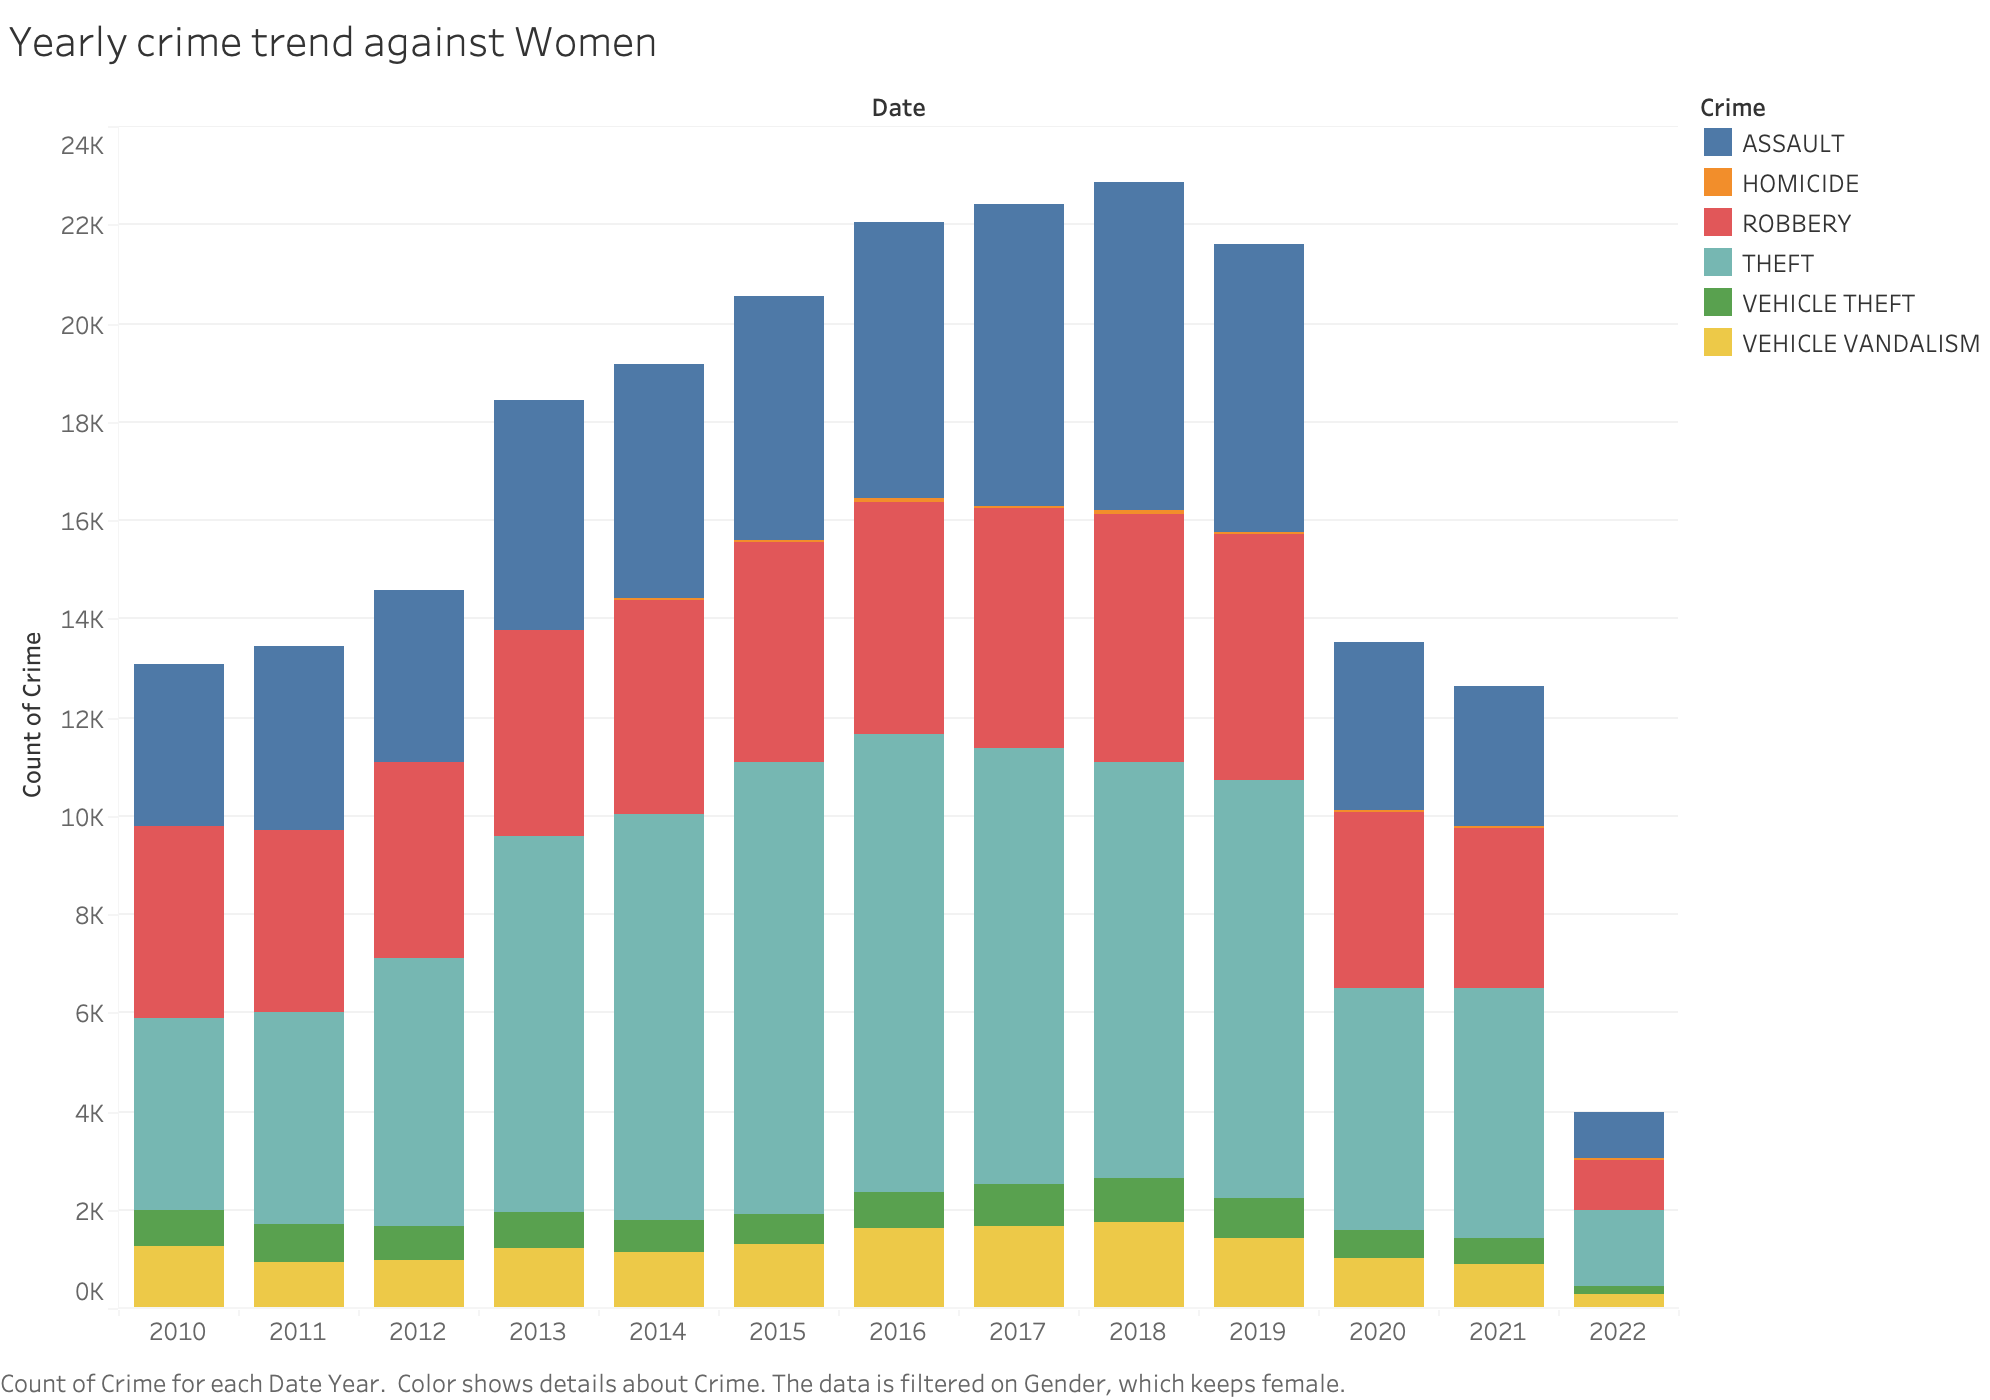

* Total crimes against women have steadily increased over years till 2019 but have dropped since then, this change in trend can be attributed to lockdown issued in the country due to the Corona crises.

In [79]:
# Extracting tags from Subtype victim column
# Tags can be defined as description about the crime location or the type of the victim.

df['SubtypeVictim_Type'] = df['SubtypeVictim'].str.findall(r"(?<=\[)([^]]+)(?=\])")
df['SubtypeVictim_Type'] = df['SubtypeVictim_Type'].apply(' '.join)
df['SubtypeVictim_Type'].unique()

array(['PERSON', 'VEHICLE', 'OTHER', 'BULDING', 'HOUSING', 'BUILDING',
       'VEHICULO', 'OTHERS', 'VEHICULE'], dtype=object)

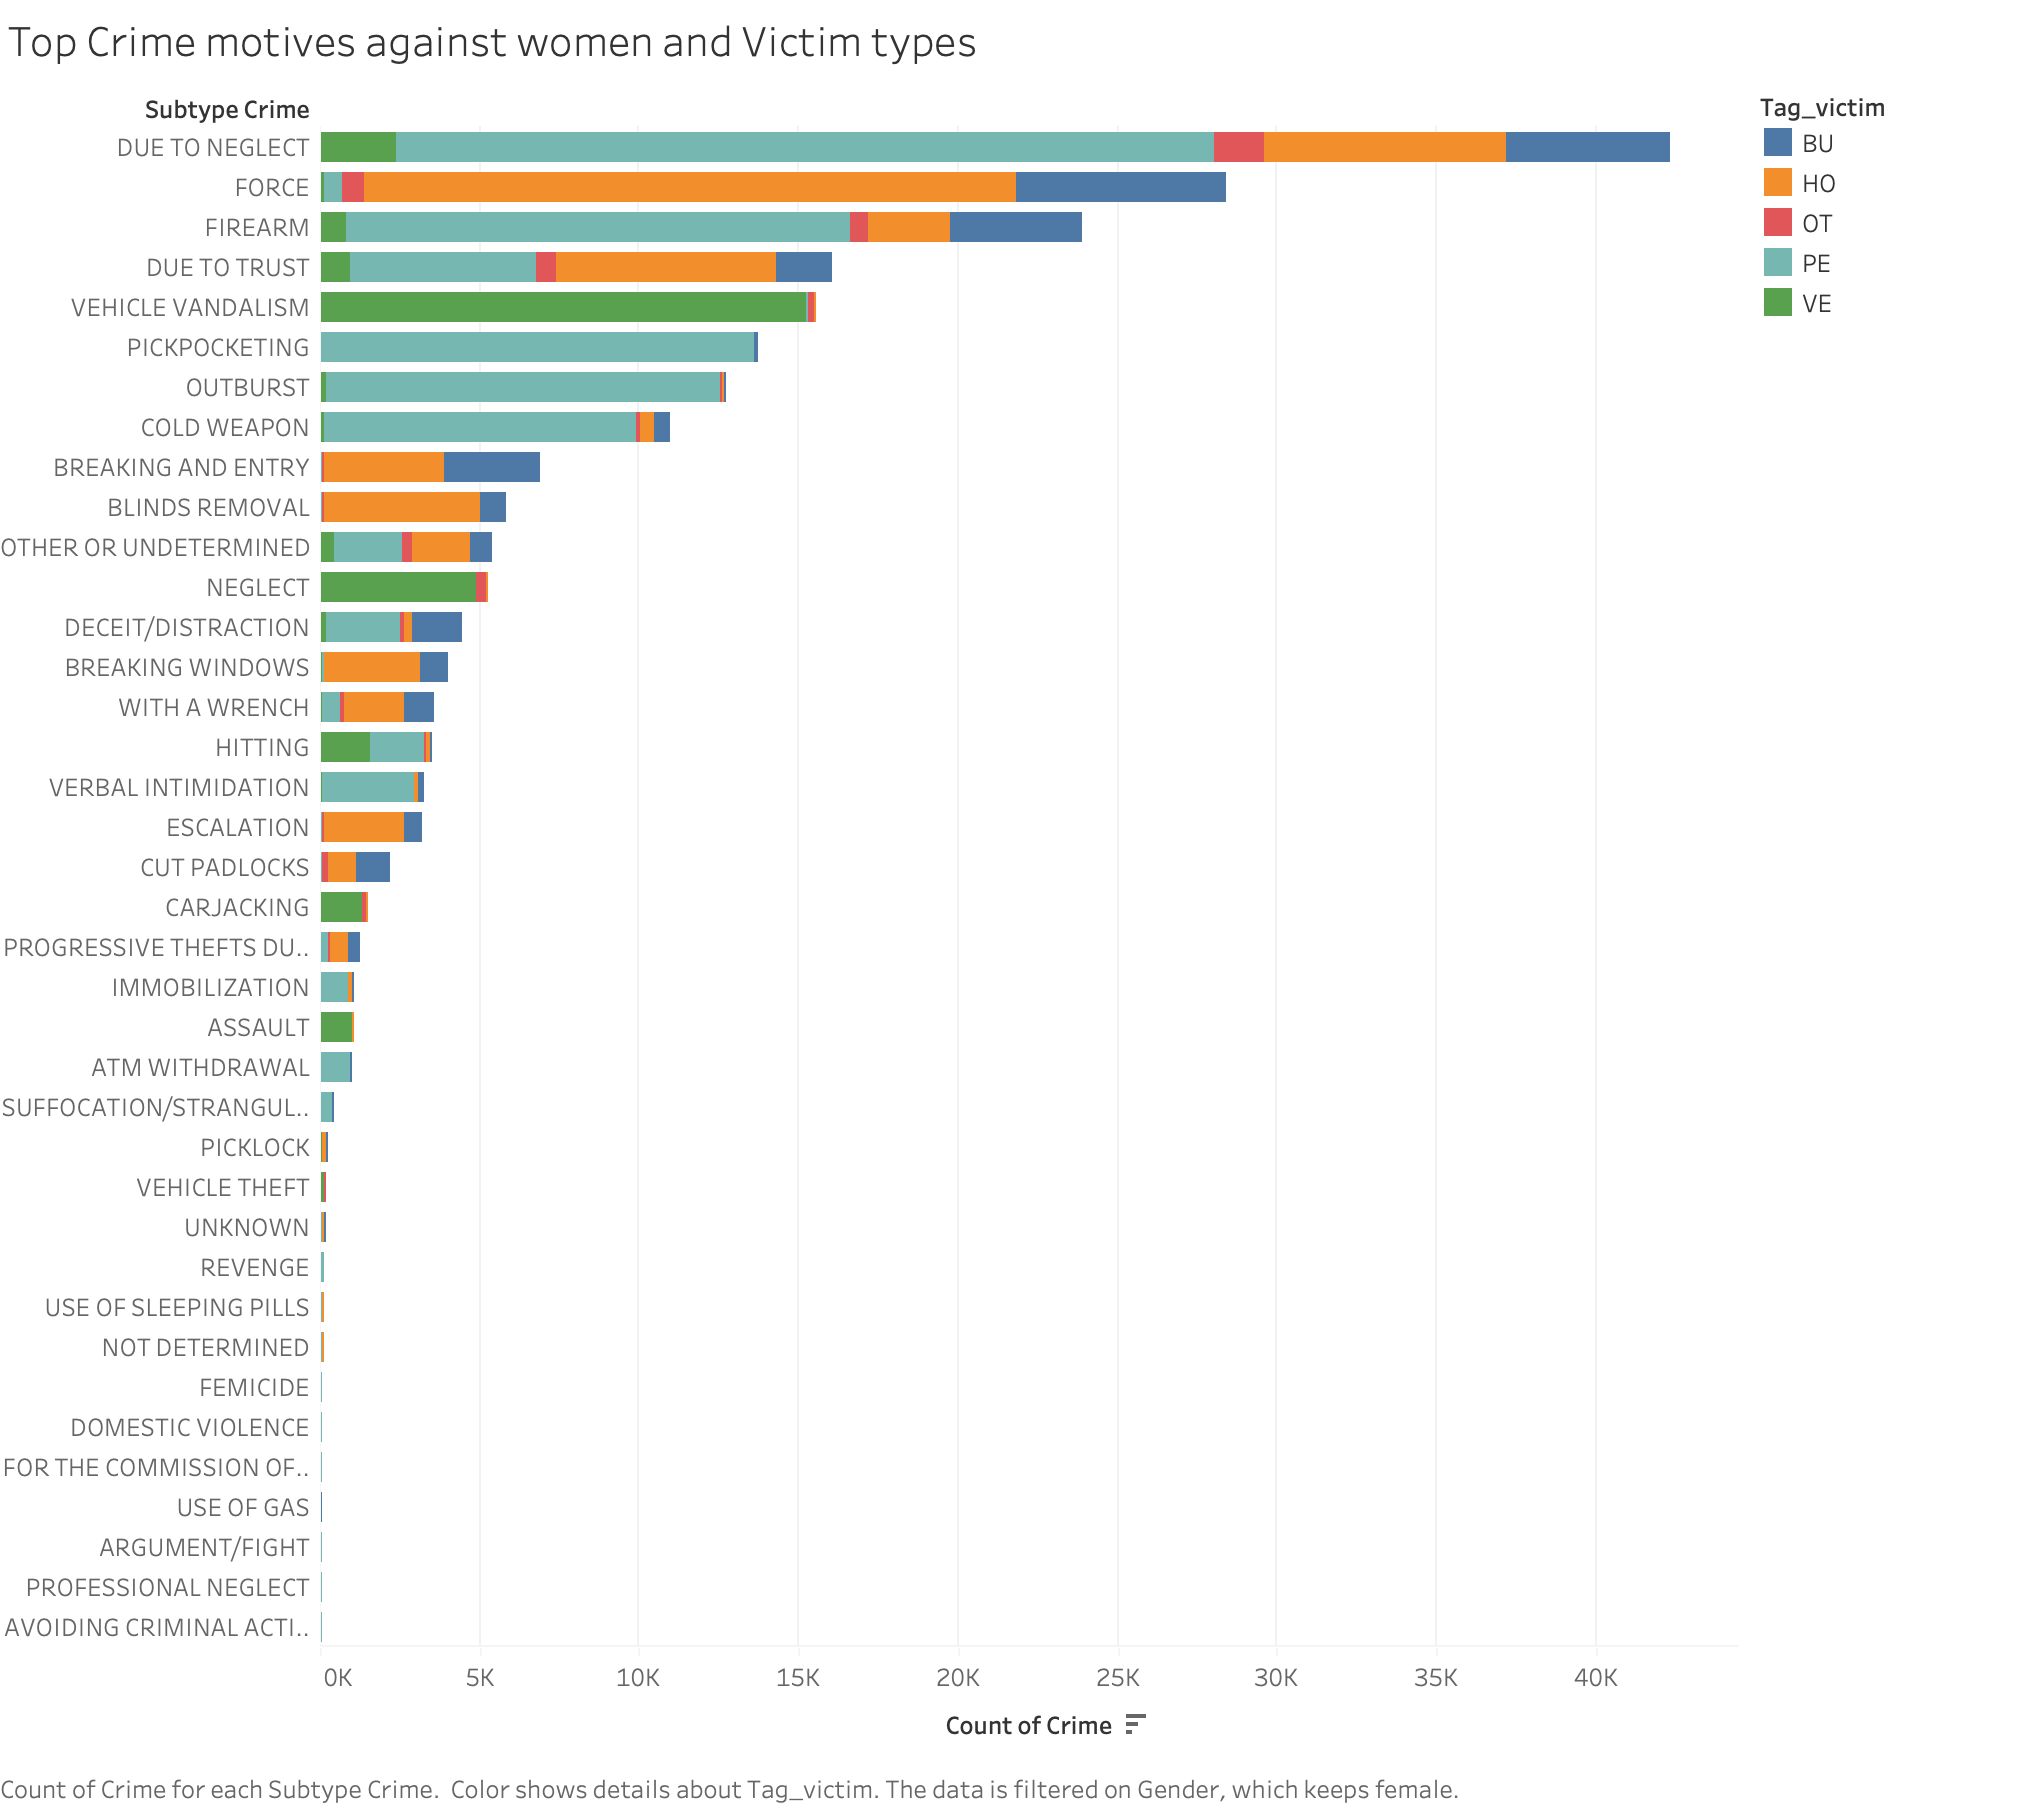

* The above plot gives an idea about most frequently occuring crime motives and respective tags
* Since the aim of the challenge is to provide a saftey score for Women in public places, we shall filter only those tags which would correspond to crimes in public spaces .i.e `Building` and `Household` tags, which are clearly indoor crimes, shall be dropped

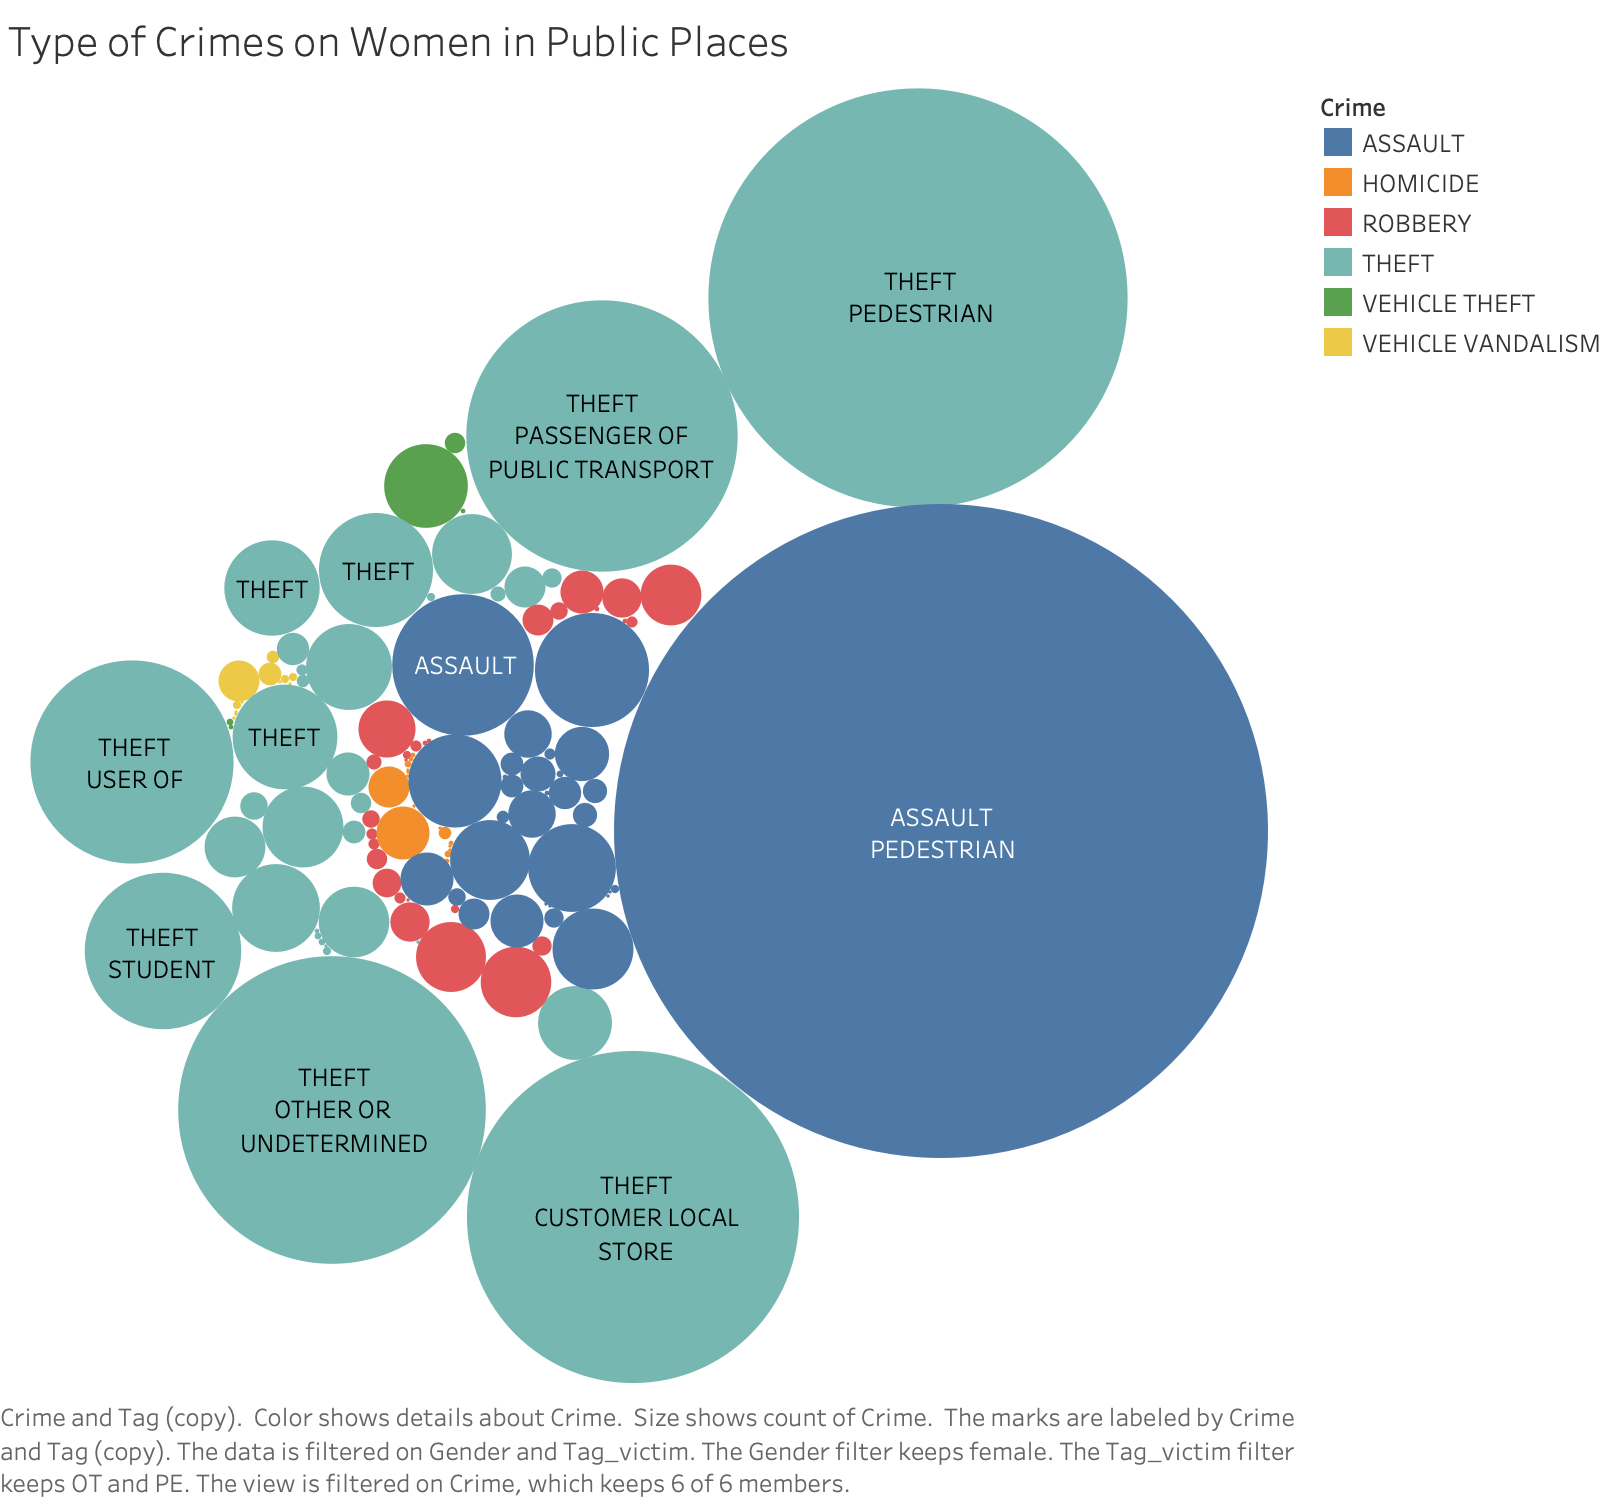

* The above bubble plot shows that most common type of crime against female in public places is Assault.
* A close second is `Theft` crime in public spaces

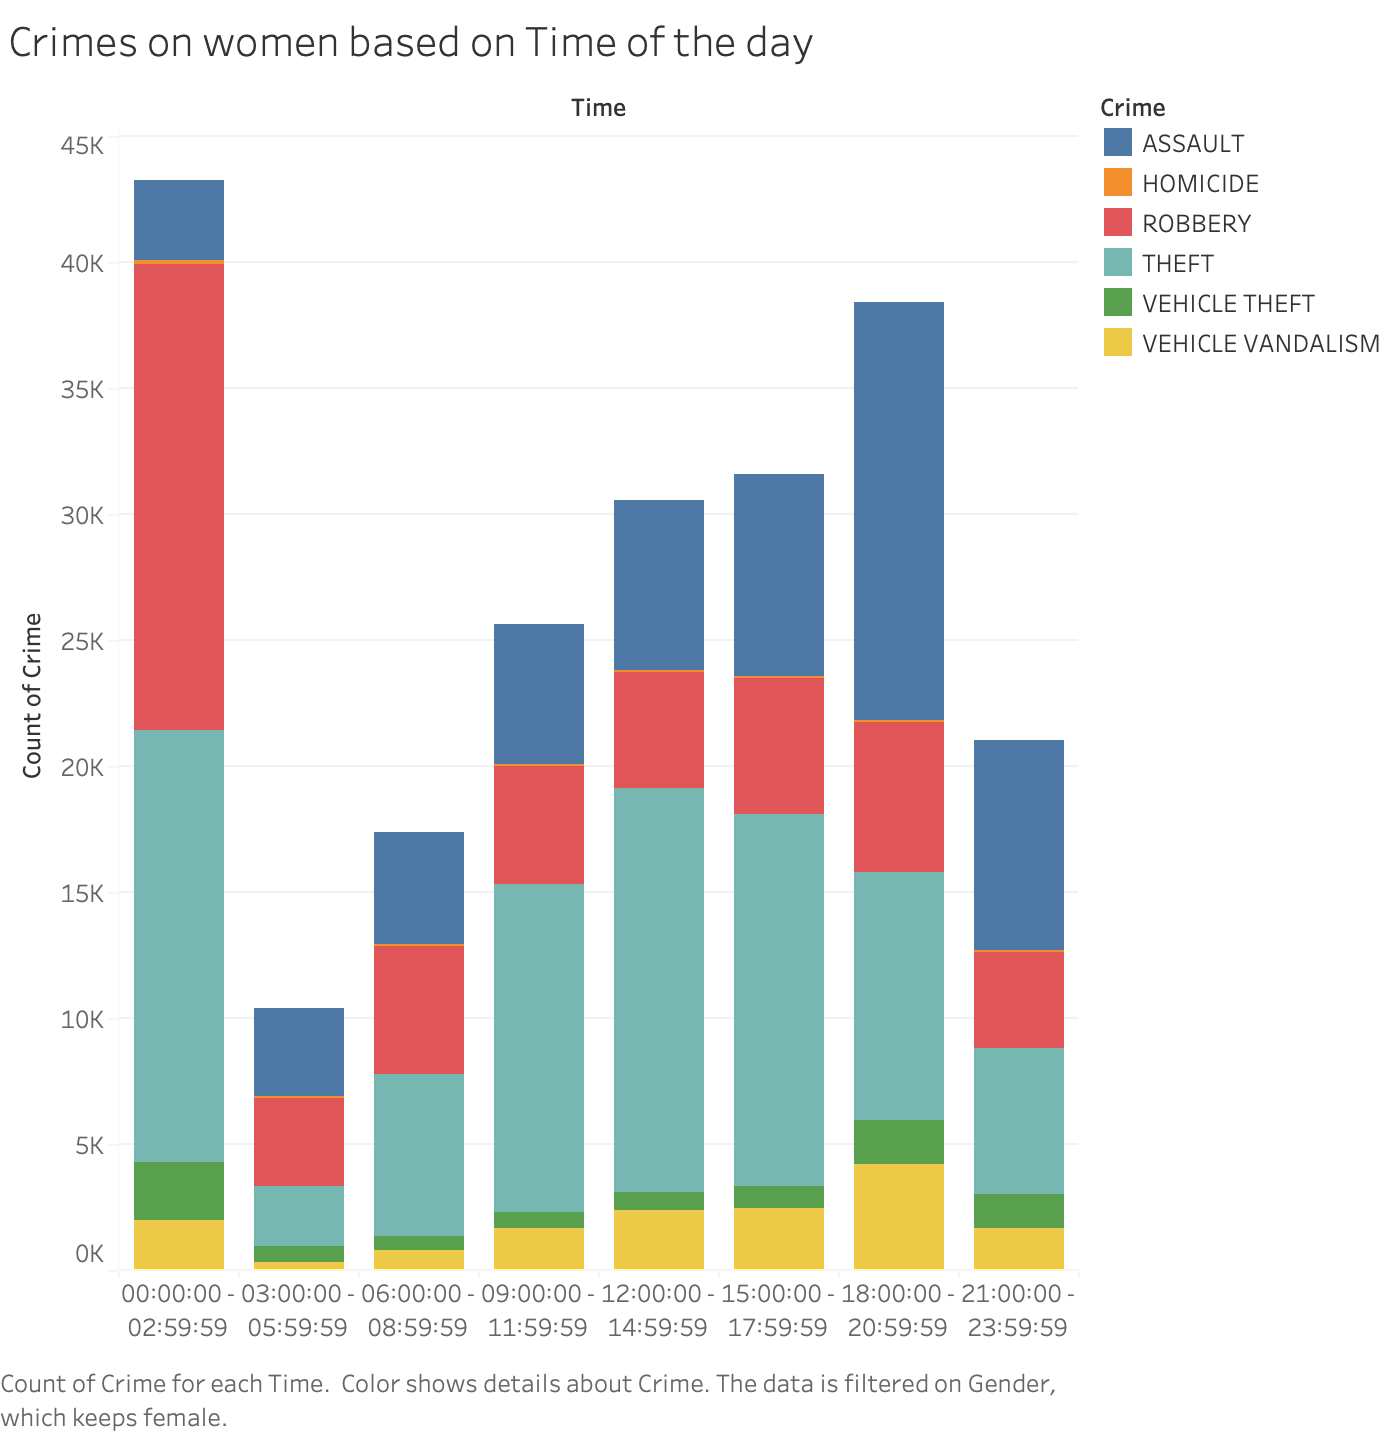

* From above plot, it can be observed that most number of reported crimes occur late night after midnight.
* There is also a significant number of crimes being reported that had occurred late evening before 21:00 Hrs.
* 'Assault' type crime on women occurs the most during late evenings.

In [80]:
#Focussing on crimes that happen only in Public spaces 
df = df[df['SubtypeVictim_Type'].isin(['PERSON', 'OTHER','VEHICULE','VEHICLE', 'VEHICULO'])]

In [81]:
#Select females only
df_fe = df[df['Gender']=='female']

In [82]:
#date convert
df_fe['new_date']=pd.to_datetime(df_fe['Date'],format='%d.%m.%y')
time_min_max = df_fe['Time'].str.split(pat = '-', expand = True)
df_fe["min_time"]= time_min_max[0]
df_fe["max_time"]= time_min_max[1]
df_fe["min_time"] = df_fe["min_time"].str.strip()
df_fe["max_time"] = df_fe["max_time"].str.strip()
df_fe['year'] = df_fe['new_date'].dt.year

In [83]:
# Finding crime count per district and per year
df_fe_PCDY_count = pd.pivot_table(df_fe[['Province', 'Canton', 'District', 'year', 'Crime', 'SubtypeCrime']], index=['Province', 'Canton', 'District', 'year'], columns='Crime', aggfunc='count', fill_value=0).reset_index()
df_fe_PCDY_count = df_fe_PCDY_count.T.reset_index(drop=True).T
df_fe_PCDY_count.columns = ['Province', 'Canton', 'District', 'year', 'ASSAULT','HOMICIDE', 
                          'ROBBERY', 'THEFT', 'VEHICLE THEFT', 'VEHICLE VANDALISM']
df_fe_PCDY_count = df_fe_PCDY_count.reset_index().rename_axis(axis=1)


In [84]:
column_names = ['ASSAULT', 'HOMICIDE', 'ROBBERY','THEFT', 'VEHICLE THEFT', 'VEHICLE VANDALISM']
df_fe_PCDY_count['tot_crime'] = df_fe_PCDY_count[column_names].sum(axis=1).astype(int)
df_fe_PCDY_count = df_fe_PCDY_count[df_fe_PCDY_count['year']!=2022]
df_fe_PCDY_count.head()

index  Province    Canton  District  year ASSAULT HOMICIDE ROBBERY THEFT  \
0      0  ALAJUELA  ALAJUELA  ALAJUELA  2010     116        0       1    80   
1      1  ALAJUELA  ALAJUELA  ALAJUELA  2011      61        0       3    78   
2      2  ALAJUELA  ALAJUELA  ALAJUELA  2012      86        0       5   117   
3      3  ALAJUELA  ALAJUELA  ALAJUELA  2013     141        0       9   190   
4      4  ALAJUELA  ALAJUELA  ALAJUELA  2014     130        2       4   226   

  VEHICLE THEFT VEHICLE VANDALISM  tot_crime  
0            40                43        280  
1            25                18        185  
2            34                21        263  
3            32                36        408  
4            14                33        409

In [85]:
#Population Data

pop = pd.read_csv('data/costarica_pop_2011_2022.csv', sep=";")
pop.drop(['Unnamed: 0','province_population', 'country_population'], axis=1, inplace=True)
pop = pop.dropna(subset=['district_population'])
pop['district_population'] = pop['district_population'].astype(int)
pop.head()

Province    Canton  District  year  district_population
0  ALAJUELA  ALAJUELA  ALAJUELA  2011                45895
1  ALAJUELA  ALAJUELA  ALAJUELA  2012                46184
2  ALAJUELA  ALAJUELA  ALAJUELA  2013                46467
3  ALAJUELA  ALAJUELA  ALAJUELA  2014                46742
4  ALAJUELA  ALAJUELA  ALAJUELA  2015                47012

In [86]:
#Merging population and crime total data

df_fe_PCDY_count_2011_2021 = df_fe_PCDY_count[df_fe_PCDY_count['year']!=2010]
df_all = pd.merge(df_fe_PCDY_count_2011_2021, pop,  how='left', left_on=['Province', 'Canton', 'District', 'year'], 
                  right_on = ['Province', 'Canton', 'District', 'year'])
#df_all.fillna(0, inplace=True)
df_all[(df_all['Province']=='ALAJUELA') & (df_all['Canton']=='ALAJUELA') & (df_all['District']=='ALAJUELA')]

index  Province    Canton  District  year ASSAULT HOMICIDE ROBBERY THEFT  \
0       1  ALAJUELA  ALAJUELA  ALAJUELA  2011      61        0       3    78   
1       2  ALAJUELA  ALAJUELA  ALAJUELA  2012      86        0       5   117   
2       3  ALAJUELA  ALAJUELA  ALAJUELA  2013     141        0       9   190   
3       4  ALAJUELA  ALAJUELA  ALAJUELA  2014     130        2       4   226   
4       5  ALAJUELA  ALAJUELA  ALAJUELA  2015     140        0       7   254   
5       6  ALAJUELA  ALAJUELA  ALAJUELA  2016     114        0       1   217   
6       7  ALAJUELA  ALAJUELA  ALAJUELA  2017      88        0       0   171   
7       8  ALAJUELA  ALAJUELA  ALAJUELA  2018      89        0       4   135   
8       9  ALAJUELA  ALAJUELA  ALAJUELA  2019      80        1       4   152   
9      10  ALAJUELA  ALAJUELA  ALAJUELA  2020      72        1       0    84   
10     11  ALAJUELA  ALAJUELA  ALAJUELA  2021      55        1       0    96   

   VEHICLE THEFT VEHICLE VANDALISM  tot_crime  district_population  
0             25                18        185              45895.0  
1             34                21        263              46184.0  
2             32                36        408              46467.0  
3             14                33        409              46742.0  
4             16                26        443              47012.0  
5             32                26        390              47255.0  
6             24                34        317              47477.0  
7             26                36        290              47689.0  
8             25                13        275              47885.0  
9             21                17        195              48078.0  
10             7                14        173              48214.0

#### Saftey Index Formulation : 

Saftey score = Average crime count against females in public places per 10,000 population of the district over past 10 years.

The score we define has a inverse relationship with Saftey of women i.e Higher the score , higher is the crime in the district , meaning that district is less safe for Women.


In [87]:
#Find crime rate for 10k population of each district from 2011 - 2022
df_all['fe_crime_rate_per_10k_population'] = (df_all['tot_crime']/df_all['district_population'])*10000

In [88]:
#Find avg crime rate
df_all_mean = df_all.groupby(['Province', 'Canton', 'District'])['fe_crime_rate_per_10k_population'].mean()
df_all_mean = df_all_mean.reset_index()
df_all_mean.columns = ['Province', 'Canton', 'District','fe_crime_rate_per_10k_population_avg']
df_all_mean.fillna(0, inplace=True)

In [89]:
df_all_mean.nlargest(n=10, columns = 'fe_crime_rate_per_10k_population_avg')

Province         Canton       District  \
501    SAN JOSE       SAN JOSE         CARMEN   
502    SAN JOSE       SAN JOSE       CATEDRAL   
507    SAN JOSE       SAN JOSE         MERCED   
505    SAN JOSE       SAN JOSE       HOSPITAL   
376  PUNTARENAS            OSA  BAHIA BALLENA   
506    SAN JOSE       SAN JOSE   MATA REDONDA   
263     HEREDIA        HEREDIA        HEREDIA   
367  PUNTARENAS       GARABITO           JACO   
465    SAN JOSE  MONTES DE OCA      SAN PEDRO   
389  PUNTARENAS     PUNTARENAS         COBANO   

     fe_crime_rate_per_10k_population_avg  
501                            885.338214  
502                            258.651151  
507                            236.225175  
505                            195.339806  
376                            191.608403  
506                            144.371990  
263                            142.337299  
367                            128.173231  
465                             99.735367  
389                             97.138397

In [90]:
df_all_mean.nsmallest(n=10, columns = 'fe_crime_rate_per_10k_population_avg')

Province       Canton     District  fe_crime_rate_per_10k_population_avg
3   ALAJUELA     ALAJUELA  DESCONOCIDO                                   0.0
5   ALAJUELA     ALAJUELA    LA GARITA                                   0.0
17  ALAJUELA       ATENAS  DESCONOCIDO                                   0.0
24  ALAJUELA  DESCONOCIDO  DESCONOCIDO                                   0.0
26  ALAJUELA       GRECIA  DESCONOCIDO                                   0.0
36  ALAJUELA      GUATUSO  DESCONOCIDO                                   0.0
40  ALAJUELA   LOS CHILES  DESCONOCIDO                                   0.0
45  ALAJUELA      NARANJO  DESCONOCIDO                                   0.0
55  ALAJUELA      OROTINA  DESCONOCIDO                                   0.0
61  ALAJUELA     PALMARES  DESCONOCIDO                                   0.0

#### Plotting crime rate on the Map with Saftey score color coding

In [91]:
habitat = gpd.read_file('data/cri_adm_2021_wgs_84/cri_admbnda_adm3_2021_WGS_84.shp')

In [92]:
arc_gis_ref = pd.read_csv('data/district_name_match/arcgis_data.csv', encoding = 'latin-1')

In [93]:
df_arc_gis_format  = habitat.merge(arc_gis_ref, on=['ADM1_ES','ADM2_ES','ADM3_ES'], how='left')
gdf_all = gpd.GeoDataFrame(df_arc_gis_format)

In [94]:
df_all_mean = df_all_mean[df_all_mean['fe_crime_rate_per_10k_population_avg'].notna()]
scaler = MinMaxScaler()
df_all_mean['fe_crime_rate_per_10k_population_avg_nor'] = scaler.fit_transform(df_all_mean[["fe_crime_rate_per_10k_population_avg"]])
gdf_all = gdf_all.merge(df_all_mean, on=['Province','Canton','District'], how='left')
gdf_all = gpd.GeoDataFrame(gdf_all)
gdf_all.fillna(0, inplace=True)

In [95]:
gdf_san_jose = gdf_all[(gdf_all['Province']=='SAN JOSE') & (gdf_all['Canton']=='SAN JOSE')]

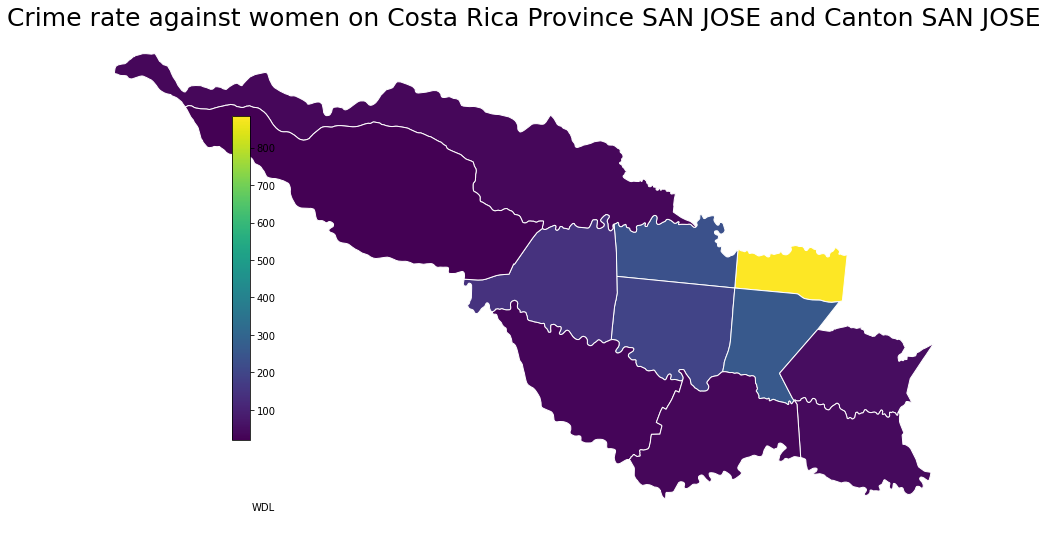

In [96]:
# Plot the map
cmap = 'viridis'
title = 'Crime rate against women on Costa Rica Province SAN JOSE and Canton SAN JOSE'
col = 'fe_crime_rate_per_10k_population_avg'
source = 'WDL'
vmin = gdf_san_jose[col].min()
vmax = gdf_san_jose[col].max()
fig, ax = plt.subplots(1, figsize=(25, 9))
ax.axis('off')
gdf_san_jose.plot(column=col, ax=ax, edgecolor='1', linewidth=1, cmap=cmap)
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate(
    source, xy=(0.24, .08), xycoords='figure fraction', horizontalalignment='left', 
    verticalalignment='bottom', fontsize=10)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbaxes = fig.add_axes([0.35, 0.25, 0.01, 0.5])
cbar = fig.colorbar(sm, cax=cbaxes)

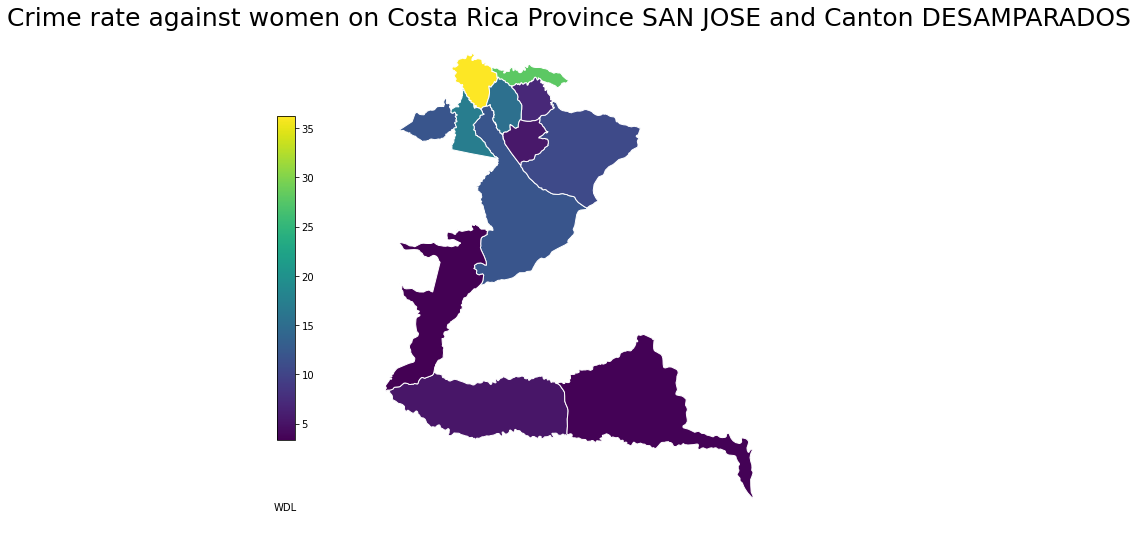

In [97]:
gdf_san_jose = gdf_all[(gdf_all['Province']=='SAN JOSE') & (gdf_all['Canton']=='DESAMPARADOS')]
# Plot the map
cmap = 'viridis'
title = 'Crime rate against women on Costa Rica Province SAN JOSE and Canton DESAMPARADOS'
col = 'fe_crime_rate_per_10k_population_avg'
source = 'WDL'
vmin = gdf_san_jose[col].min()
vmax = gdf_san_jose[col].max()
fig, ax = plt.subplots(1, figsize=(25, 9))
ax.axis('off')
gdf_san_jose.plot(column=col, ax=ax, edgecolor='1', linewidth=1, cmap=cmap)
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate(
    source, xy=(0.24, .08), xycoords='figure fraction', horizontalalignment='left', 
    verticalalignment='bottom', fontsize=10)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbaxes = fig.add_axes([0.35, 0.25, 0.01, 0.5])
cbar = fig.colorbar(sm, cax=cbaxes)

In [98]:
gdf_all['centroid_lon']=gdf_all['geometry'].centroid.x
gdf_all['centroid_lat']=gdf_all['geometry'].centroid.y
mplleaflet_data = gdf_all[['centroid_lat', 'centroid_lon', 'fe_crime_rate_per_10k_population_avg']].values.tolist()

In [99]:
m = folium.Map(location=[10.10, -83.44], zoom_start=8, tiles='CartoDB positron')
for _, r in gdf_all.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['ADM3_ES']).add_to(geo_j)
    geo_j.add_to(m)
HeatMap(mplleaflet_data).add_to(m)
m

In [100]:
#########################################################################

In [101]:
# Adjusting carmen crimerate for heatmap to look beter

In [102]:
gdf_all_2 = gdf_all.copy()

In [103]:
gdf_all_2['fe_crime_rate_per_10k_population_avg'] = np.where(
   (gdf_all_2['Province']=='SAN JOSE') & (gdf_all_2['Canton']=='SAN JOSE') & (gdf_all_2['District']=='CARMEN') , 
    gdf_all.nlargest(n=10, columns = 'fe_crime_rate_per_10k_population_avg')['fe_crime_rate_per_10k_population_avg'][1], 
    gdf_all_2['fe_crime_rate_per_10k_population_avg'])

In [104]:
mplleaflet_data_2 = gdf_all_2[['centroid_lat', 'centroid_lon', 'fe_crime_rate_per_10k_population_avg']].values.tolist()

In [105]:
m = folium.Map(location=[10.10, -83.44], zoom_start=8, tiles='CartoDB positron')
for _, r in gdf_all.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['ADM3_ES']).add_to(geo_j)
    geo_j.add_to(m)
HeatMap(mplleaflet_data_2).add_to(m)
m

### Predicting Trend of the Saftey Index

In [106]:
# Preparing data for Prophet forecasting package
df_prophet = df_all.rename(columns = {'fe_crime_rate_per_10k_population' : 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['year'].astype(str)+'-12-31')
df_prophet.y.fillna(df_prophet.y.mean(), inplace = True)

In [107]:
df_prophet.head()

index  Province    Canton  District  year ASSAULT HOMICIDE ROBBERY THEFT  \
0      1  ALAJUELA  ALAJUELA  ALAJUELA  2011      61        0       3    78   
1      2  ALAJUELA  ALAJUELA  ALAJUELA  2012      86        0       5   117   
2      3  ALAJUELA  ALAJUELA  ALAJUELA  2013     141        0       9   190   
3      4  ALAJUELA  ALAJUELA  ALAJUELA  2014     130        2       4   226   
4      5  ALAJUELA  ALAJUELA  ALAJUELA  2015     140        0       7   254   

  VEHICLE THEFT VEHICLE VANDALISM  tot_crime  district_population          y  \
0            25                18        185              45895.0  40.309402   
1            34                21        263              46184.0  56.946129   
2            32                36        408              46467.0  87.804248   
3            14                33        409              46742.0  87.501605   
4            16                26        443              47012.0  94.231260   

          ds  
0 2011-12-31  
1 2012-12-31  
2 2013-12-31  
3 2014-12-31  
4 2015-12-31

In [108]:
# Testing on Carmen district in San Jose Province
df_yearly = df_prophet[(df_prophet.Province == 'SAN JOSE')&(df_prophet.District == 'CARMEN')][['ds','y']]

#Excluding data where Corona affected the crime numbers
df_yearly = df_yearly[df_yearly.ds < '2020-01-01']

In [109]:
#Forecasting for next 3 years

Prophet = fbprophet.Prophet
m = Prophet()
m.fit(df_yearly)

future = m.make_future_dataframe(periods=3, freq='Y')

fcst = m.predict(future)
fig = m.plot(fcst)
fig = m.plot_components(fcst)

NameError: name 'fbprophet' is not defined

In [ ]:
df_all_forecasts = pd.DataFrame()
for province in df_prophet['Province'].unique():
    for district in df_prophet['District'].unique():
        
        df_loop = df_prophet[(df_prophet['Province'] == province)&(df_prophet['District'] == district)
                            &(df_prophet['year'] < 2020)][['ds','y']]
        if df_loop.shape[0]>=2:
            m_loop = Prophet()
            m_loop.fit(df_loop)
            future_loop = m_loop.make_future_dataframe(periods=4, freq='Y')
            forecast_loop = m_loop.predict(future_loop)
            forecast_type =  forecast_loop[['ds', 'trend','yhat']]
            forecast_type['Province'] = province
            forecast_type['District'] = district
            df_all_forecasts = df_all_forecasts.append(forecast_type)

In [ ]:
df_all_forecasts.to_csv('df_all_forecasts.csv')

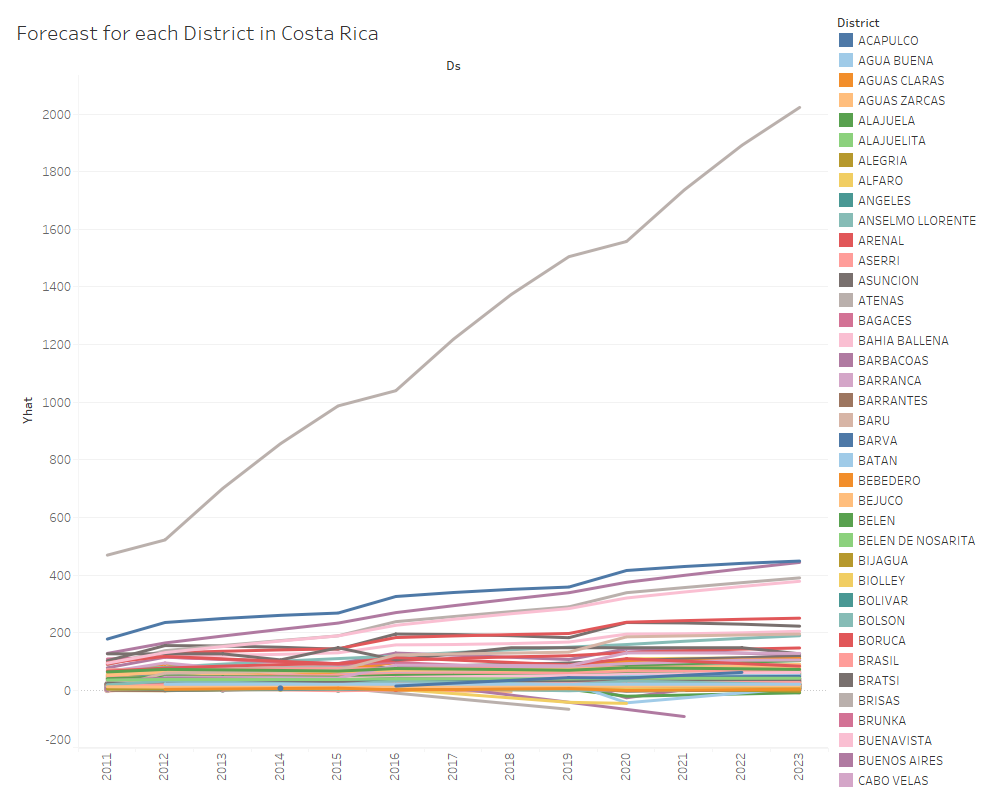

### ML Models to find affect of other factors on Saftey

In [110]:
df_all = pd.merge(df_all, df_all_mean,  how='right', left_on=['Province', 'Canton', 'District'], 
                  right_on = ['Province', 'Canton', 'District'])
df_all.head()

index  Province    Canton  District  year ASSAULT HOMICIDE ROBBERY THEFT  \
0      1  ALAJUELA  ALAJUELA  ALAJUELA  2011      61        0       3    78   
1      2  ALAJUELA  ALAJUELA  ALAJUELA  2012      86        0       5   117   
2      3  ALAJUELA  ALAJUELA  ALAJUELA  2013     141        0       9   190   
3      4  ALAJUELA  ALAJUELA  ALAJUELA  2014     130        2       4   226   
4      5  ALAJUELA  ALAJUELA  ALAJUELA  2015     140        0       7   254   

  VEHICLE THEFT VEHICLE VANDALISM  tot_crime  district_population  \
0            25                18        185              45895.0   
1            34                21        263              46184.0   
2            32                36        408              46467.0   
3            14                33        409              46742.0   
4            16                26        443              47012.0   

   fe_crime_rate_per_10k_population  fe_crime_rate_per_10k_population_avg  \
0                         40.309402                             64.615771   
1                         56.946129                             64.615771   
2                         87.804248                             64.615771   
3                         87.501605                             64.615771   
4                         94.231260                             64.615771   

   fe_crime_rate_per_10k_population_avg_nor  
0                                  0.072984  
1                                  0.072984  
2                                  0.072984  
3                                  0.072984  
4                                  0.072984

In [111]:
# Reading Census Data
district_data=pd.read_csv('data/district_data.csv')

In [112]:
columns_distric_data=pd.read_csv('data/Columns.csv', encoding= 'unicode_escape')

In [113]:
columns_distric_data.columns=['spanish_name', 'english_name']
district_data=district_data.drop(columns=['Unnamed: 0'])
district_data.columns = list(columns_distric_data['english_name'])
district_data['regions'] = district_data['{Province, Canton, District}'].apply(lambda x: list(x.strip('{}').replace('"','').split(",")))
district_data['Province'] = district_data['regions'].apply(lambda x: x[0])
district_data['Canton'] = district_data['regions'].apply(lambda x: x[1])
district_data['District'] = district_data['regions'].apply(lambda x: x[2])
district_data=district_data.drop(columns=['{Province, Canton, District}'])
district_data["Province"] = district_data["Province"].str.strip()
district_data["Canton"] = district_data["Canton"].str.strip()
district_data["District"] = district_data["District"].str.strip()
district_data.head()

Unique code (similar to zipcode)  \
0                           10101.0   
1                           10102.0   
2                           10103.0   
3                           10104.0   
4                           10105.0   

   Rate of Assaults per 10K inhabitants 2016  \
0                                      994.0   
1                                      355.0   
2                                      320.0   
3                                      352.0   
4                                       84.0   

   Rate of intentional homicides per 10K inhabitants 2016  \
0                                                0.0        
1                                                4.0        
2                                                5.0        
3                                                5.0        
4                                                0.0        

   Rate of theft per 10K inhabitants 2016  \
0                                  1010.0   
1                                   327.0   
2                                   254.0   
3                                   378.0   
4                                    33.0   

   Rate of robbery per 10K inhabitants 2016  \
0                                     204.0   
1                                      60.0   
2                                      41.0   
3                                      71.0   
4                                      33.0   

   Rate of Vehicle theft per 10K inhabitants 2016  \
0                                            74.0   
1                                            21.0   
2                                            19.0   
3                                            32.0   
4                                            11.0   

   Rate of rape per 10K inhabitants 2016  \
0                                    6.0   
1                                    7.0   
2                                    3.0   
3                                    1.0   
4                                    0.0   

   Economic category of the IDS 2017 by district  \
0                                          68.48   
1                                          41.70   
2                                          40.26   
3                                          47.08   
4                                          57.68   

   Citizen participation category of the IDS 2017 by district  \
0                                              41.11            
1                                              39.93            
2                                              36.12            
3                                              43.00            
4                                              49.73            

   Health category of the IDS 2017 by district  ...  \
0                                        78.15  ...   
1                                        76.35  ...   
2                                        74.53  ...   
3                                        83.26  ...   
4                                        82.95  ...   

   Demographic dependency ratio (%): Corresponds to a demographic measure to express the ratio of the population, \nin terms of age, between potentially active people and potentially dependent (inactive) people. 2011 census  \
0                                          46.927678                                                                                                                                                                              
1                                          45.345666                                                                                                                                                                              
2                                          47.132931                                                                                                                                                                              
3                              

In [114]:
df_all_2017 = df_all_mean

In [115]:
# Remove outliers
df_all_2017 = df_all_2017.dropna(subset=['fe_crime_rate_per_10k_population_avg'])
df_all_2017 = df_all_2017[(df_all_2017['Province']!='SAN JOSE') & 
                          (df_all_2017['Canton']!='SAN JOSE') & 
                          (df_all_2017['District']!='CARMEN')]
df_all_2017 = df_all_2017[df_all_2017['fe_crime_rate_per_10k_population_avg']!=0]

In [116]:
df_all_2017

Province      Canton      District  \
0      ALAJUELA    ALAJUELA      ALAJUELA   
1      ALAJUELA    ALAJUELA      CARRIZAL   
2      ALAJUELA    ALAJUELA  DESAMPARADOS   
4      ALAJUELA    ALAJUELA       GUACIMA   
6      ALAJUELA    ALAJUELA   RIO SEGUNDO   
..          ...         ...           ...   
394  PUNTARENAS  PUNTARENAS    MANZANILLO   
395  PUNTARENAS  PUNTARENAS   MONTE VERDE   
396  PUNTARENAS  PUNTARENAS       PAQUERA   
397  PUNTARENAS  PUNTARENAS      PITAHAYA   
398  PUNTARENAS  PUNTARENAS    PUNTARENAS   

     fe_crime_rate_per_10k_population_avg  \
0                               64.615771   
1                                7.967372   
2                               11.130610   
4                               11.903058   
6                               34.797661   
..                                    ...   
394                              7.668773   
395                             42.012542   
396                             16.146959   
397                             17.769544   
398                             86.313112   

     fe_crime_rate_per_10k_population_avg_nor  
0                                    0.072984  
1                                    0.008999  
2                                    0.012572  
4                                    0.013445  
6                                    0.039304  
..                                        ...  
394                                  0.008662  
395                                  0.047454  
396                                  0.018238  
397                                  0.020071  
398                                  0.097492  

[320 rows x 5 columns]

In [117]:
df_all_2017 = pd.merge(df_all_2017, district_data,  how='right', left_on=['Province', 'Canton', 'District'], 
                  right_on = ['Province', 'Canton', 'District'])
df_all_2017.fillna(0, inplace=True)

In [118]:
df_all_2017 = df_all_2017[df_all_2017['fe_crime_rate_per_10k_population_avg']!=0]

#### Adding google ratings, counts for bars, nightclubs, police stations, bridges and bus stops

In [119]:
# External Data
external_data = pd.read_csv('data/external_data/external_data.csv')
external_data.drop(['Unnamed: 0','ADM1_ES', 'ADM2_ES', 'ADM3_ES'], axis=1, inplace=True)

In [ ]:
external_data

In [ ]:
df_all_2017 = pd.merge(df_all_2017, external_data,  how='left', left_on=['Province', 'Canton', 'District'], 
                  right_on = ['Province', 'Canton', 'District'])

In [ ]:
# Dropping features related to crime rates to avoid data leakage to the model
df_all_2017.drop(['Rate of Assaults per 10K inhabitants 2016',
       'Rate of intentional homicides per 10K inhabitants 2016',
       'Rate of theft per 10K inhabitants 2016',
       'Rate of robbery per 10K inhabitants 2016',
       'Rate of Vehicle theft per 10K inhabitants 2016',
       'Rate of rape per 10K inhabitants 2016'], axis=1, inplace=True)

In [ ]:
df_all_2017

In [ ]:
df_all_2017.columns

In [ ]:
# Dropping features which do not contribute to model learning

df_all_2017.drop(['Province', 'Canton', 'District', 'fe_crime_rate_per_10k_population_avg_nor', 'Unique code (similar to zipcode)',
                  'regions'], axis=1, inplace=True)

In [ ]:
df_all_2017=df_all_2017.fillna(0)
#df["Percentage of population aged 65 and over"] = df_all_2017[df_all_2017['Percentage of population aged 65 and over']
df_all_2017.loc[df_all_2017['Percentage of population aged 65 and over'] == '*', 'Percentage of population aged 65 and over'] = '0'
df_all_2017['Percentage of population aged 65 and over'] = df_all_2017['Percentage of population aged 65 and over'].astype(float)
df_all_2017.columns = df_all_2017.columns.astype(str)

In [ ]:
df_all_2017.columns

In [ ]:
# Checking if tehre are any highly corelated features among themselves and wrt target variable
numerical_features = ['fe_crime_rate_per_10k_population_avg',
       'Economic category of the IDS 2017 by district',
       'Citizen participation category of the IDS 2017 by district',
       'Health category of the IDS 2017 by district',
       'Education category of the IDS 2017 by district',
       'Security category of the IDS 2017 by district',
       'Social Development Index 2017', 'Total population 2011 census',
       'Population density 2011 census',
       'Urban population percentage 2011 census',
       'Ratio men to women 2011 census',
       'Demographic dependency ratio',
       'Percentage of population aged 65 and over',
       'Percentage of population born abroad 2011 census',
       'Percentage of people in union or married 2011 census',
       'Percentage of people living with a disability 2011 census',
       'Percentage of people without social security 2011 census',
       'park_rating_avg', 'transit_rating_avg', 'bar_count', 'nightclub_count',
       'bridge_count', 'aeroway_count', 'police_count', 'busstop_count',
       'hospital_count', 'forest_count', 'sexual_harassement', 'exhibitionism',
       'pursuit_or_cornering', 'production_of_audiovisual_material',
       'sexual_harassement_law']
df_all_2017.columns = numerical_features

plt.figure(figsize=(20, 20))
sns.heatmap(df_all_2017[numerical_features].corr(), cmap="seismic", annot=True)

In [ ]:
y=df_all_2017['fe_crime_rate_per_10k_population_avg']
train=df_all_2017.drop(columns=['fe_crime_rate_per_10k_population_avg'])

In [ ]:
#Split the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 0)
#y_train = y_train.reshape(-1,1)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

lr = linear_model.LinearRegression(normalize=True)
initial = df_all_2017.drop(columns=['fe_crime_rate_per_10k_population_avg'])
feature_name=list(initial)
Y = df_all_2017['fe_crime_rate_per_10k_population_avg']
predicted = cross_val_predict(lr, initial, Y, cv=10)
print('10_fold_cv_MSE is ',mean_squared_error(Y, predicted))
y_pred = lr.fit(initial, Y).predict(initial)

print('MSE on training set is ',mean_squared_error(Y, y_pred))

# print('coef is ',lr.coef_)

min=np.min(lr.coef_)
print('min is ',min)
index_min = np.argmin(lr.coef_)
print(index_min)
max=np.max(lr.coef_)
print('max is ',max)
index_max = np.argmax(lr.coef_)
print(index_max)
print('coefficient[min] is ',feature_name[index_min])

print('coefficient[max] is ',feature_name[index_max])

In [ ]:
import shap
# Fits the explainer
explainer = shap.Explainer(lr.predict, X_train)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_train)

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
features_base = list(initial.columns)
base_coef = list(zip(features_base,lr.coef_))
print("\nCoefficients : ")
for row in base_coef:
    print(row)

* Social develop index has thes highest impact on the model which fits well as when the index increases the crime rate decreases, which makes complete sense.
* Impact of other features do not make sense, for. eg. according to the model, with increase in Educational or Economic index, the crime rate increases.
* Hence we shall try a different model

### Decision tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [ ]:
df_all_2017.head()

In [ ]:
from sklearn import preprocessing

x = df_all_2017.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_all_normalised = pd.DataFrame(x_scaled)
df_all_normalised.columns = df_all_2017.columns

In [ ]:
df_all_normalised

In [ ]:
y=df_all_normalised['fe_crime_rate_per_10k_population_avg']
train=df_all_normalised.drop(columns=['fe_crime_rate_per_10k_population_avg'])
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 0)

In [ ]:
# Plotting the distribution of target variable to find an appropriate threshold to classify the crime rates as High and Low 
plt.hist(df_all_normalised['fe_crime_rate_per_10k_population_avg'])

In [ ]:
#Decision Tree

df_all_normalised['highCrime'] = np.where(df_all_normalised['fe_crime_rate_per_10k_population_avg']>0.1, 1, 0)

In [ ]:
#df_all_normalised[df_all_normalised['highCrime']==df_all_normalised['highCrime'].max()]

In [ ]:
df_all_normalised['highCrime'].value_counts()

In [ ]:
pos=df_all_normalised[(df_all_normalised['highCrime'] == 1)]
pos_percentage=len(pos)/len(df_all_normalised)
neg_percentage=1-pos_percentage
print('positive instance percentage is ',pos_percentage)
print('negative instance percentage is ',neg_percentage)

In [ ]:
initial = df_all_normalised
initial = initial.drop('fe_crime_rate_per_10k_population_avg', 1)
initial = initial.drop('highCrime', 1)

Y = df_all_normalised['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=8)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(initial, Y)
clf
y_pred = clf.predict(initial)
list(initial)
feature_name=list(initial)
import pydotplus 
from IPython.display import Image 
classname=["High", "Low"]
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(initial),  
                         class_names=classname,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

In [ ]:
from sklearn.model_selection import cross_val_score
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(initial, Y)
    y_pred = clf.predict(initial)
    scores = cross_val_score(estimator=clf, X=initial, y=Y, cv=10)
    #scores = cross_val_score(clf, initial, Y,None,'accuracy',cv=10)
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()

print('',y)

In [ ]:
feature_selection = clf.feature_importances_ 
   

ind = np.argpartition(feature_selection, -4)[-4:]

print('ind is ',ind)
print('4_max_normalized_feature is ',feature_selection[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

* This model seems to be accurate as well assigns some sensible weights to the used features
* Eg. If ratio of men to women is high then the model says that there will be a high crime rate, which also reflects the reality to some extent as most crimes inflicted on women are by men.
* Eg. If the number of bus stop counts in a distric is low then the model predicts a higher crime rate. This could be a valid argument as public infrastructure determines its level of development. It also leads to higher number of population travelling on their own which can be a cause of higher number of crimes due to absence of public around.